# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities_PC.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [3]:
#print(cities)
#print(weather_api_key)

In [4]:
### Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
#http://api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=25cac9dce6a31b42dfca976765c80739
city=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
Max_Temp=[]
Wind_Speed=[]

units = "imperial"
base_url="http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL


for c in cities: 
    query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
    response =requests.get(query_url+c).json()
    #print(response)
    try:
        city.append(response["name"])
        Cloudiness.append(response["clouds"]["all"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Wind_Speed.append(response["wind"]["speed"])
        #* Include a print log of each city as it'sbeing processed (with the city number and city name).
        print(f'Processing Record  {c}  ')
        
    except:
        print("City not found")
        

City not found
Processing Record  busselton  
Processing Record  dikson  
Processing Record  atuona  
City not found
Processing Record  kattivakkam  
Processing Record  chulym  
Processing Record  hilo  
Processing Record  rikitea  
Processing Record  butaritari  
Processing Record  castro  
Processing Record  ushuaia  
Processing Record  arkhara  
City not found
Processing Record  kurikka  
Processing Record  kapaa  
Processing Record  bluff  
City not found
Processing Record  port alfred  
Processing Record  coquimbo  
Processing Record  atar  
Processing Record  airai  
Processing Record  pietermaritzburg  
Processing Record  constitucion  
City not found
Processing Record  plettenberg bay  
City not found
Processing Record  carnarvon  
Processing Record  mar del plata  
Processing Record  yellowknife  
Processing Record  soe  
City not found
Processing Record  kieta  
Processing Record  yomou  
City not found
Processing Record  vaini  
Processing Record  alattyan  
Processing Recor

Processing Record  sassandra  
Processing Record  izhma  
Processing Record  port-cartier  
Processing Record  paamiut  
Processing Record  ponta do sol  
Processing Record  luwuk  
Processing Record  puerto cabezas  
Processing Record  lavrentiya  
Processing Record  henderson  
Processing Record  puerto suarez  
Processing Record  bochalema  
Processing Record  salalah  
Processing Record  cordoba  
Processing Record  ashqelon  
Processing Record  moerai  
Processing Record  gari  
Processing Record  tuatapere  
Processing Record  gravelbourg  
Processing Record  lata  
Processing Record  nurota  
Processing Record  gladstone  
City not found
City not found
Processing Record  clarksdale  
Processing Record  mirabad  
City not found
City not found
Processing Record  nantucket  
Processing Record  godfrey  
Processing Record  svetlogorsk  
Processing Record  inhambane  
Processing Record  requena  
Processing Record  nedjo  
Processing Record  blyth  
Processing Record  yar-sale  
Proc

Processing Record  shaunavon  
Processing Record  flin flon  
Processing Record  minjur  
Processing Record  comodoro rivadavia  
Processing Record  quelimane  
City not found
Processing Record  kargasok  
Processing Record  port lincoln  
Processing Record  puerto colombia  
Processing Record  tazovskiy  
Processing Record  negombo  
Processing Record  kysyl-syr  
Processing Record  san-pedro  
Processing Record  nemuro  
Processing Record  vila  
Processing Record  rawalpindi  
City not found
City not found
Processing Record  te anau  
Processing Record  lodwar  
Processing Record  qaqortoq  
Processing Record  oussouye  
City not found


In [5]:
print(len(city))
print(Date[0])

539
1578358068


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:

city_df=pd.DataFrame({
"cities":city,
"Cloudiness":Cloudiness,
"Country":Country,
"Date":Date,
"Humidity":Humidity,
"Lat":Lat,
"Lng":Lng,
"Max_Temp":Max_Temp,
"Wind_Speed":Wind_Speed    
})

city_df.head()

,cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Busselton,0,AU,1578358068,19,-33.64,115.35,82.99,7.34
1,Dikson,100,RU,1578358216,95,73.51,80.55,12.13,10.51
2,Atuona,0,PF,1578358216,70,-9.80,-139.03,80.55,12.33
3,Kattivakkam,40,IN,1578358216,88,13.22,80.32,80.01,8.05
4,Chulym,100,RU,1578358216,95,55.09,80.97,23.22,8.86


In [7]:
#Write the data to a csv file
#output_data_file = "../output_data/cities_PC.csv"
city_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [8]:
print(Date[0])

1578358068


Here we are ploting city temprature and latitudes.Analysing the plot tells us the temprature near the equater are higher as compared to the city higher latitudes. 


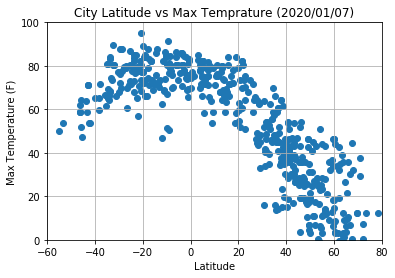

In [9]:
#convert (Unix time, UTC), to date format

dt=int(Date[0])
dt=datetime.datetime.utcfromtimestamp(Date[0]).strftime('%Y/%m/%d')


x_values = city_df['Lat']
y_values = city_df['Max_Temp']
plt.ylim(0,100)
plt.xlim(-60,80)
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temprature ({dt})')
plt.grid()
#plt.show()
plt.savefig("../Images/LatitudeVsMaxTemprature.png")
print('Here we are ploting city temprature and latitudes.Analysing the plot tells us the temprature near the equater are higher as compared to the city higher latitudes. ')

#### Latitude vs. Humidity Plot

Here we are ploting the Humidity vs Latitudes.


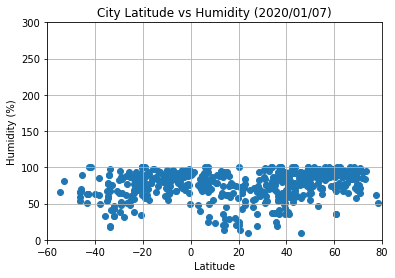

In [10]:
x_values = city_df['Lat']
y_values = city_df['Humidity']
plt.ylim(0,300)
plt.xlim(-60,80)
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({dt})')
plt.grid()
#plt.show()
plt.savefig("../Images/LatitudeVsHumidity.png")
print('Here we are ploting the Humidity vs Latitudes.')

#### Latitude vs. Cloudiness Plot

Here er are ploting Latitude vs Cloudiness. Ananlysis sya that the Clodiness is not dependent on Latitude. 


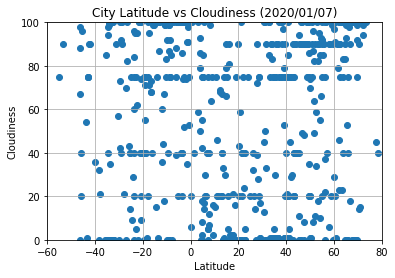

In [11]:
x_values = city_df['Lat']
y_values = city_df['Cloudiness']
plt.ylim(0,100)
plt.xlim(-60,80)
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'City Latitude vs Cloudiness ({dt})')
plt.grid()
#plt.show()
plt.savefig("../Images/LatitudeVsCloudiness.png")
print('Here er are ploting Latitude vs Cloudiness. Ananlysis sya that the Clodiness is not dependent on Latitude. ')

#### Latitude vs. Wind Speed Plot

Here we are ploting Latitude vs Wind Speed.Ananlysis say that Latitude has no affect on wind speed


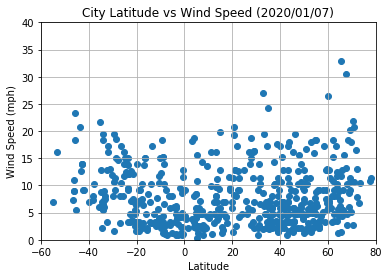

In [12]:
x_values = city_df['Lat']
y_values = city_df['Wind_Speed']
plt.ylim(0,40)
plt.xlim(-60,80)
plt.scatter(x_values,y_values)
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title(f'City Latitude vs Wind Speed ({dt})')
plt.grid()
#plt.show()
plt.savefig("../Images/LatitudeVsWindSpeed.png")
print('Here we are ploting Latitude vs Wind Speed.Ananlysis say that Latitude has no affect on wind speed')

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def cal_regression(x_values, y_values):
    # Perform a linear regression on x and y 
    #(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    #linregress

    # Get regression values
    regress_values = x_values * slope + intercept
    
    plt.plot(x_values,regress_values,"r-")
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    #print(line_eq)
    return regress_values

In [14]:
# Create Northern and Southern Hemisphere DataFrames
north_df=city_df[(city_df["Lat"]>0)]
north_df.head()

south_df=city_df[(city_df["Lat"]<0)]
south_df.head()

,cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Busselton,0,AU,1578358068,19,-33.64,115.35,82.99,7.34
2,Atuona,0,PF,1578358216,70,-9.80,-139.03,80.55,12.33
6,Rikitea,95,PF,1578358216,74,-23.12,-134.97,76.91,12.15
8,Castro,90,CL,1578358216,100,-42.48,-73.76,53.60,9.17
9,Ushuaia,75,AR,1578357994,66,-54.81,-68.31,50.00,6.93


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8620271036768694


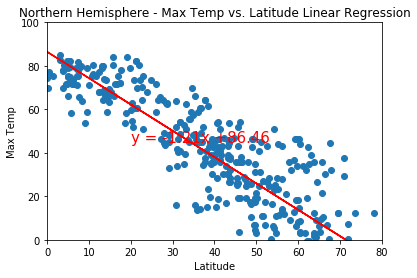

Negatively corelated


In [15]:

plt.scatter(north_df["Lat"],north_df["Max_Temp"])
plt.ylim(0,100)
plt.xlim(0,80)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")   

#liner regression    
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Lat"],north_df["Max_Temp"])
#linregress

# Get regression values
regress_values =north_df["Lat"] * slope + intercept
    
plt.plot(north_df["Lat"],regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,45),fontsize=15,color="red")
#print(line_eq)
print(f"The r-squared is: {rvalue}")
#call the regression function
#reg_North_temp_lat =cal_regression(north_df["Lat"],north_df["Max_Temp"])
plt.show()            
#plt.savefig("../Images/NorthHmsTemp_lat.png")            
            
print('Negatively corelated')        

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.44090310091472723


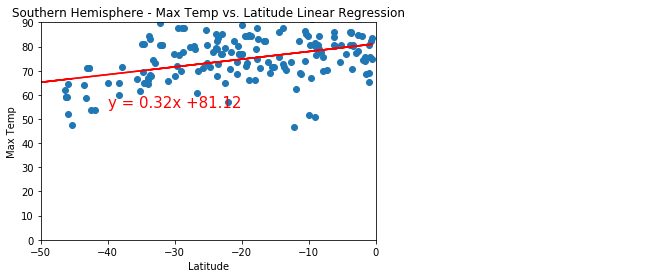

R vale is low


In [16]:

plt.scatter(south_df["Lat"],south_df["Max_Temp"])
plt.ylim(0,90)
plt.xlim(-50,0)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")   


#liner regression    
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Lat"],south_df["Max_Temp"])
#linregress

# Get regression values
regress_values =south_df["Lat"] * slope + intercept
    
plt.plot(south_df["Lat"],regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-40,55),fontsize=15,color="red")
#print(line_eq)
print(f"The r-squared is: {rvalue}")
#call the regression function
reg_south_temp_lat =cal_regression(south_df["Lat"],south_df["Max_Temp"])
plt.show()  
#plt.savefig("../Images/SouthHmsTemp_lat.png") 
print('R vale is low')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.30091468619558637


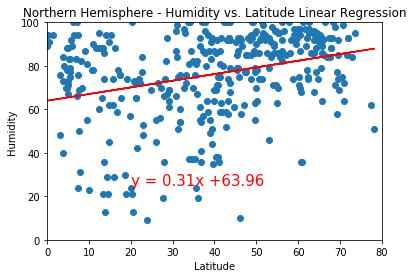

Positive but the r value is very low


In [17]:

plt.scatter(north_df["Lat"],north_df["Humidity"])
plt.ylim(0,100)
plt.xlim(0,80)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")   

#liner regression    
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Lat"],north_df["Humidity"])
#linregress

# Get regression values
regress_values =north_df["Lat"] * slope + intercept
    
plt.plot(north_df["Lat"],regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
#print(line_eq)
print(f"The r-squared is: {rvalue}")

plt.show()            
#plt.savefig("../output_data/NorthHmsHumidity_lat.png")            
print('Positive but the r value is very low')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.37266962409831017


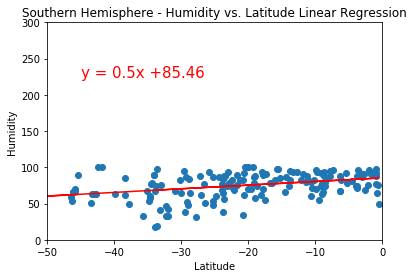

In [18]:
#print(south_df["Humidity"].max())
#print(south_df["Humidity"].min())
#print(south_df["Lat"].max())
#print(south_df["Lat"].min())
#print(north_df["Humidity"].count())
#print(city_df["Humidity"].count())



plt.scatter(south_df["Lat"],south_df["Humidity"])
plt.ylim(0,300)
plt.xlim(-50,0)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")   

#liner regression    
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Lat"],south_df["Humidity"])
#linregress

# Get regression values
regress_values =south_df["Lat"] * slope + intercept
    
plt.plot(south_df["Lat"],regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-45,225),fontsize=15,color="red")
#print(line_eq)
print(f"The r-squared is: {rvalue}")

plt.show()            
#plt.savefig("../output_data/SouthHmsHumidity_lat.png")                  

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.27632024888290757


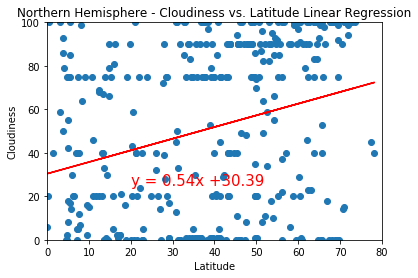

Positive coorelation but thevalue is very low


In [19]:

plt.scatter(north_df["Lat"],north_df["Cloudiness"])
plt.ylim(0,100)
plt.xlim(0,80)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")   

#liner regression    
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Lat"],north_df["Cloudiness"])
#linregress

# Get regression values
regress_values =north_df["Lat"] * slope + intercept
    
plt.plot(north_df["Lat"],regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
#print(line_eq)
print(f"The r-squared is: {rvalue}")

plt.show() 
#plt.savefig("../output_data/NorthHmsCloudiness_lat.png")     
print('Positive coorelation but thevalue is very low')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19279231373508218


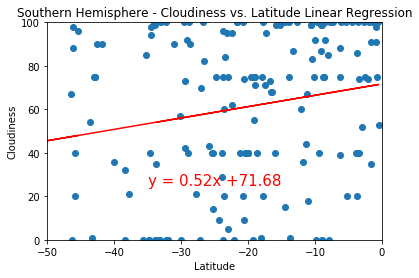

Not a good regression value


In [20]:
plt.scatter(south_df["Lat"],south_df["Cloudiness"])
plt.ylim(0,100)
plt.xlim(-50,0)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")   

#liner regression    
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Lat"],south_df["Cloudiness"])
#linregress

# Get regression values
regress_values =south_df["Lat"] * slope + intercept
    
plt.plot(south_df["Lat"],regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-35,25),fontsize=15,color="red")
#print(line_eq)
print(f"The r-squared is: {rvalue}")

plt.show()   
#plt.savefig("../output_data/SouthHmsCloudiness_lat.png")   
print('Not a good regression value')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.17011526880459227


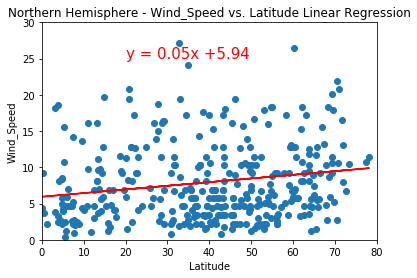

Not a good regression value


In [21]:

#print(north_df.columns)
plt.scatter(north_df["Lat"],north_df["Wind_Speed"])
plt.ylim(0,30)
plt.xlim(0,80)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Northern Hemisphere - Wind_Speed vs. Latitude Linear Regression")   

#liner regression    
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Lat"],north_df["Wind_Speed"])
#linregress

# Get regression values
regress_values =north_df["Lat"] * slope + intercept
    
plt.plot(north_df["Lat"],regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
#print(line_eq)
print(f"The r-squared is: {rvalue}")

plt.show() 
#plt.savefig("../output_data/NorthHmsWindSpeed_lat.png")   
print('Not a good regression value')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.43708564755985724


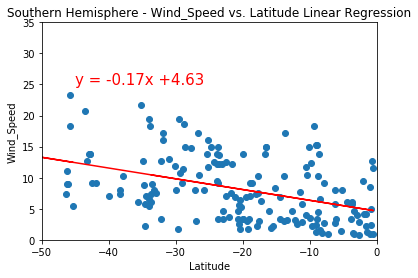

Negative regression


In [22]:
plt.scatter(south_df["Lat"],south_df["Wind_Speed"])
plt.ylim(0,35)
plt.xlim(-50,0)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Southern Hemisphere - Wind_Speed vs. Latitude Linear Regression")   

#liner regression    
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Lat"],south_df["Wind_Speed"])
#linregress

# Get regression values
regress_values =south_df["Lat"] * slope + intercept
    
plt.plot(south_df["Lat"],regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-45,25),fontsize=15,color="red")
#print(line_eq)
print(f"The r-squared is: {rvalue}")

plt.show()   
#plt.savefig("../output_data/SouthHmsWindSpeed_lat.png") 
print('Negative regression')